<a href="https://colab.research.google.com/github/CarlosRochaCx/MNA/blob/main/Actividad6FE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   NOMBRE: Carlos Alberto Rocha Chávez
*   MATRÍCULA: A01796914

In [207]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [208]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA - Maestría en Inteligencia Artificial Aplicada/Ciencia y Analítica de Datos/Actividad 6 - FE"
os.chdir(DIR)

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [210]:
cars_df = pd.read_csv('vehicles.csv')
cars_df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [211]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`, `lat`, `long`.


In [212]:
cars_df.drop(columns=['id', 'VIN', 'url', 'image_url', 'description', 'posting_date', 'lat', 'long'], inplace=True)
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   region_url    426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  county        0 non-null       float64
 17  state         426880 non-null  object 
dtypes: f

Al usar la función `drop()` se han eliminado las columnas no relevantes. Como se puede visualizar, ya no se encuentran listadas al usar la función `info()`.

1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

In [213]:
Número_de_registros, Número_de_columnas = cars_df.shape

print(f'Número de registros: {Número_de_registros}')
print(f'Número de columnas: {Número_de_columnas}')

Número de registros: 426880
Número de columnas: 18


## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://www.quora.com/How-much-missing-data-is-too-much-1

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?


In [214]:
Valores_Faltantes = cars_df.isna().sum() / Número_de_registros * 100
print('Porcentaje de valores faltantes por columna:')
Valores_Faltantes

Porcentaje de valores faltantes por columna:


,0
region,0.000000
region_url,0.000000
price,0.000000
year,0.282281
manufacturer,4.133714
model,1.236179
condition,40.785232
cylinders,41.622470
fuel,0.705819
odometer,1.030735


In [215]:
cars_df.dropna(thresh=0.7*len(cars_df), axis=1, inplace=True)
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   region_url    426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   title_status  418638 non-null  object 
 9   transmission  424324 non-null  object 
 10  type          334022 non-null  object 
 11  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 39.1+ MB


6 columnas fueron eliminadas al tener más de 30% de valores faltantes.

Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?


In [216]:
Valores_Faltantes = cars_df.isna().sum() / Número_de_registros * 100
Columnas_a_Considerar = Valores_Faltantes[Valores_Faltantes < 5].index
cars_df_cleaned = cars_df.dropna(subset=Columnas_a_Considerar)
records_deleted = len(cars_df) - len(cars_df_cleaned)
percentage_deleted = (records_deleted / len(cars_df)) * 100

print(f"Porcentaje de registros eliminados: {percentage_deleted:.2f}%")

Porcentaje de registros eliminados: 8.73%


In [217]:
cars_df = cars_df_cleaned
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389604 entries, 27 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        389604 non-null  object 
 1   region_url    389604 non-null  object 
 2   price         389604 non-null  int64  
 3   year          389604 non-null  float64
 4   manufacturer  389604 non-null  object 
 5   model         389604 non-null  object 
 6   fuel          389604 non-null  object 
 7   odometer      389604 non-null  float64
 8   title_status  389604 non-null  object 
 9   transmission  389604 non-null  object 
 10  type          306976 non-null  object 
 11  state         389604 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 38.6+ MB


2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)

In [218]:
cars_df.isna().sum()

,0
region,0
region_url,0
price,0
year,0
manufacturer,0
model,0
fuel,0
odometer,0
title_status,0
transmission,0


In [219]:
for column in cars_df.select_dtypes(include=['float64', 'int64']).columns:
    if cars_df[column].isna().sum() > 0:
        if cars_df[column].skew().abs() < 1:
            cars_df[column].fillna(cars_df[column].mean(), inplace=True)
        else:
            cars_df[column].fillna(cars_df[column].median(), inplace=True)

for column in cars_df.select_dtypes(include=['object']).columns:
    if cars_df[column].isna().sum() > 0:
        cars_df[column].fillna(cars_df[column].mode()[0], inplace=True)

cars_df.isna().sum()

<ipython-input-219-a015310eca39>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df[column].fillna(cars_df[column].mode()[0], inplace=True)
<ipython-input-219-a015310eca39>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_df[column].fillna(cars_df[column].mode()[0], inplace=True)


,0
region,0
region_url,0
price,0
year,0
manufacturer,0
model,0
fuel,0
odometer,0
title_status,0
transmission,0


## Valores atípicos

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución.

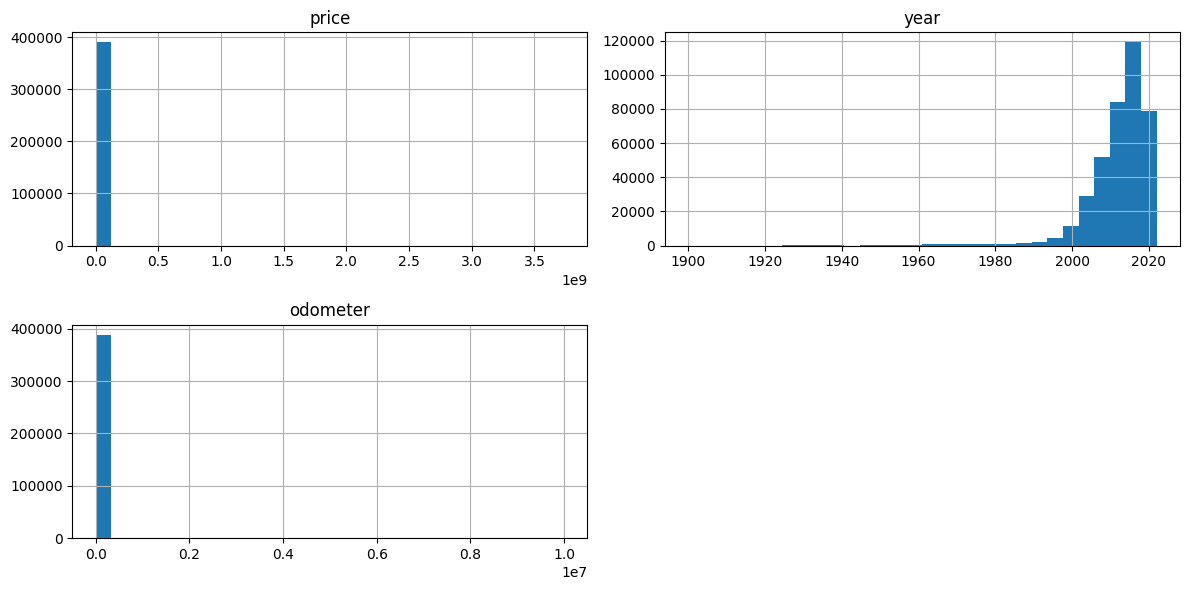

In [220]:
cars_df.hist(column=['price', 'year', 'odometer'], bins=30, figsize=(12, 6))
plt.tight_layout()
plt.show()

3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable.

<ipython-input-221-007c3bd30378>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_df['age'] = 2025 - cars_df['year']
<ipython-input-221-007c3bd30378>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_df.drop(columns=['year'], inplace=True)


array([[<Axes: title={'center': 'age'}>]], dtype=object)

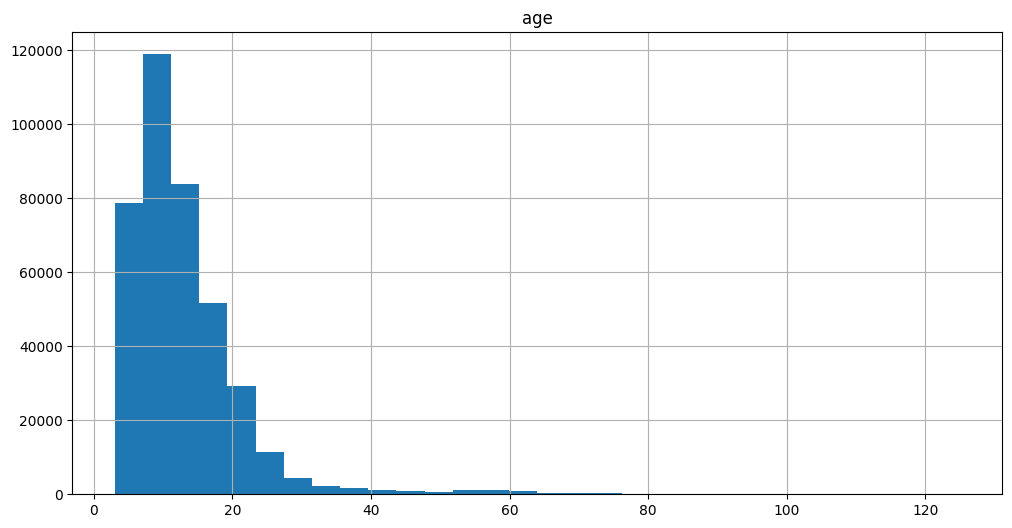

In [221]:
cars_df['age'] = 2025 - cars_df['year']
cars_df.drop(columns=['year'], inplace=True)
cars_df.hist(column=['age'], bins=30, figsize=(12, 6))

4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

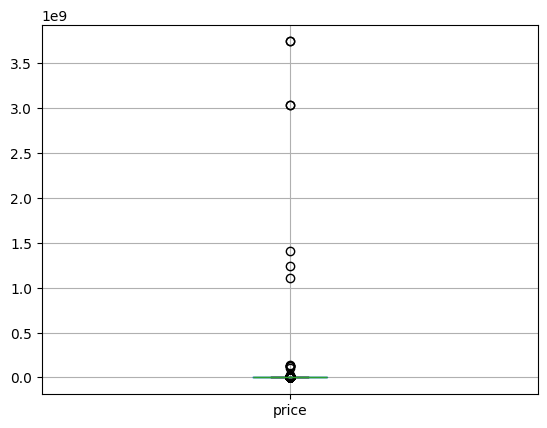

In [222]:
cars_df.boxplot(column=['price'])
plt.show()

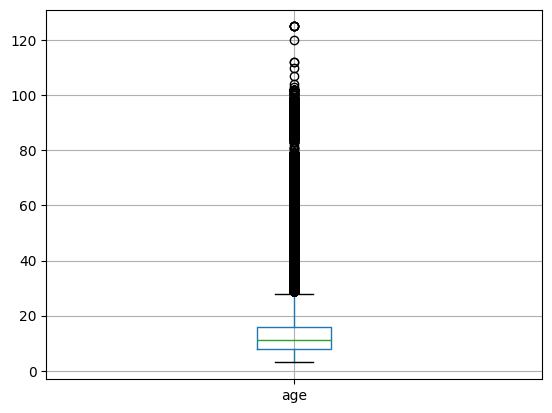

In [223]:
cars_df.boxplot(column=['age'])
plt.show()

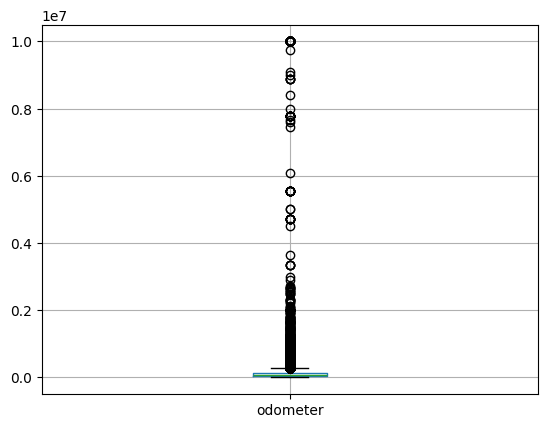

In [224]:
cars_df.boxplot(column=['odometer'])
plt.show()

Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se han eliminado en total hasta ahora?

In [225]:
def eliminar_outliers(df):
    # Guardamos el número inicial de registros
    registros_iniciales = len(df)
    outliers_eliminados = 0

    # Iteramos sobre las columnas numéricas
    for columna in df.select_dtypes(include=['float64', 'int64']).columns:
        # Calculamos los cuartiles
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1

        # Establecemos los límites inferior y superior
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Filtramos los outliers
        mask_outliers = (df[columna] < limite_inferior) | (df[columna] > limite_superior)
        registros_outliers = df[mask_outliers]

        # Contamos los registros eliminados
        outliers_eliminados += len(registros_outliers)

        # Eliminamos los outliers
        df = df[~mask_outliers]

    # Calculamos el porcentaje de registros eliminados
    porcentaje_eliminados = (outliers_eliminados / registros_iniciales) * 100

    return df, porcentaje_eliminados

# Aplicamos la función al dataframe cars_df
cars_df_limpio, porcentaje_eliminados = eliminar_outliers(cars_df)

# Imprimimos el porcentaje de registros eliminados
print(f"Porcentaje de registros eliminados: {porcentaje_eliminados:.2f}%")

Porcentaje de registros eliminados: 5.97%


4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers.

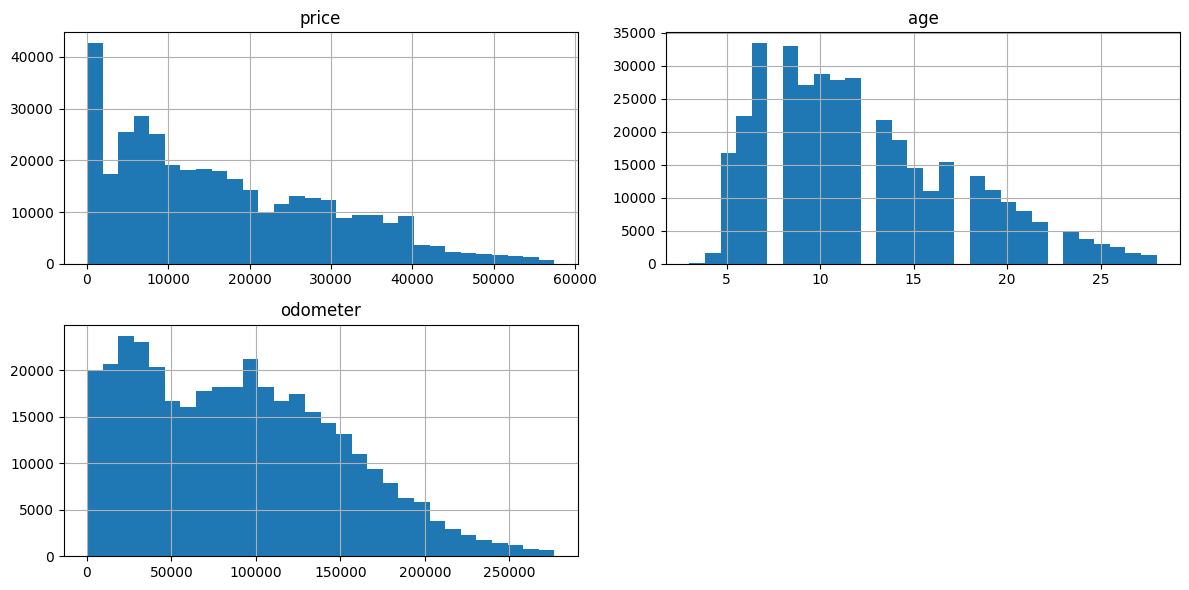

In [226]:
cars_df = cars_df_limpio

cars_df.hist(column=['price', 'age', 'odometer'], bins=30, figsize=(12, 6))
plt.tight_layout()
plt.show()

# **Parte 2**. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.




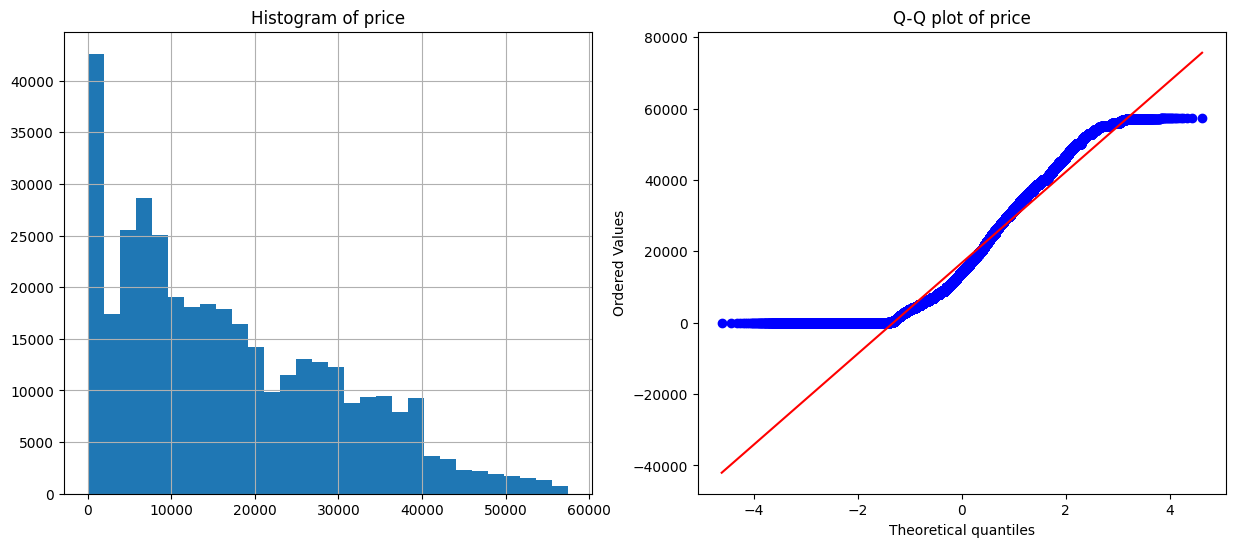

In [227]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f"Histogram of {variable}")
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")
    plt.show()

diagnostic_plots(cars_df, 'price')

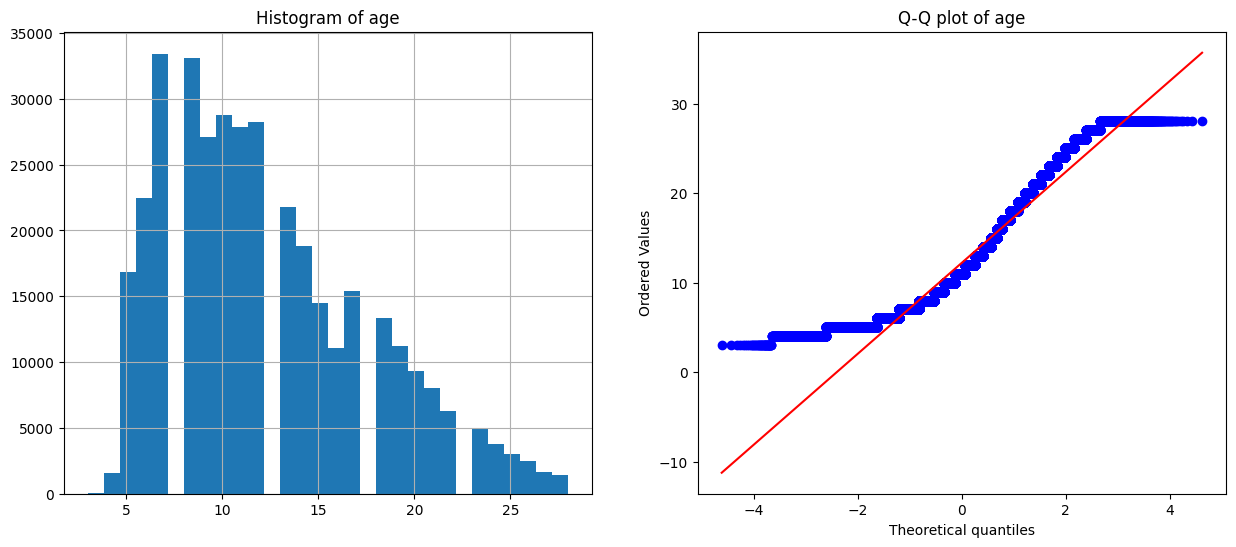

In [228]:
diagnostic_plots(cars_df, 'age')

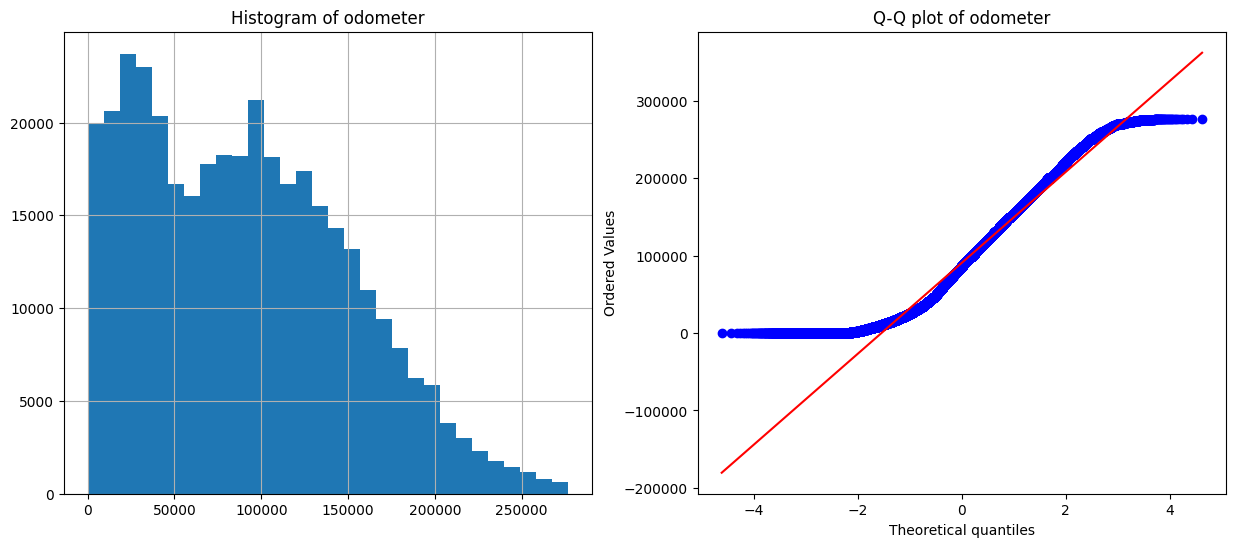

In [229]:
diagnostic_plots(cars_df, 'odometer')

Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

Recuerda que en `PowerTransformer()` el parámetro `standardize` por defecto es `True`. Con esto, después de hacer la transformación, el resultado se escala con *Z-score*, haciendo que la media sea 0 y la desviación estándar 1. Como en el ejercicio 6 ocuparás Min-Max para escalar, haz `standardize=False` para omitir el escalamiento en esta fase.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Coloca el resultado en un dataframe denominado `transf_df` que contenga sólo las variables transformadas.

In [230]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(method='yeo-johnson')
transformer.fit(cars_df[['price', 'age', 'odometer']])
transf_df = pd.DataFrame(transformer.fit_transform(cars_df[['price', 'age', 'odometer']]),
                          columns=['price', 'age', 'odometer'])


5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

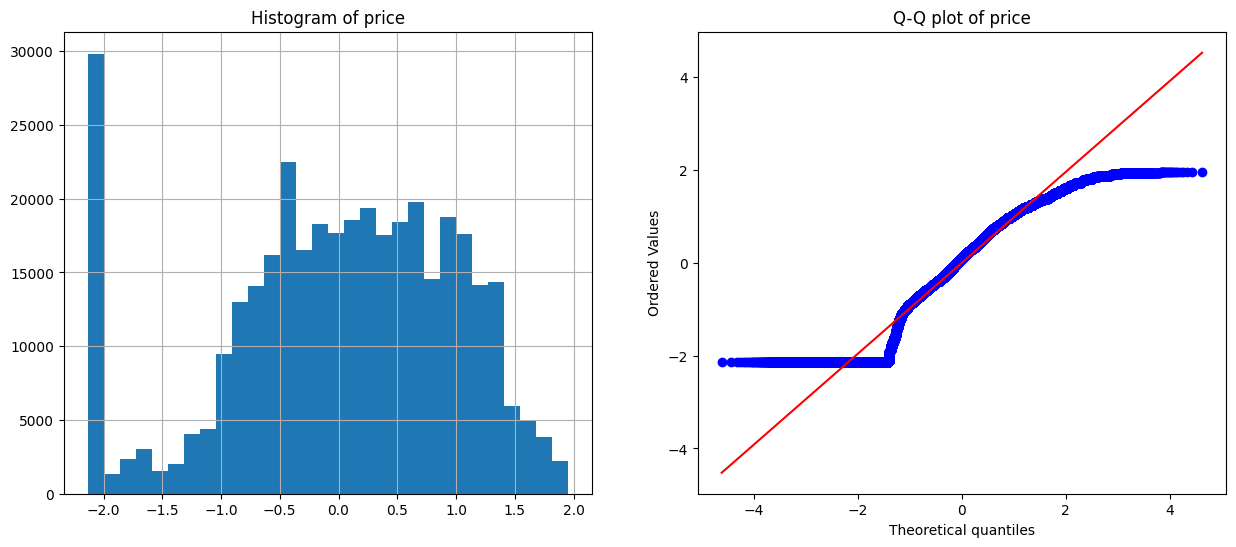

In [231]:
diagnostic_plots(transf_df, 'price')

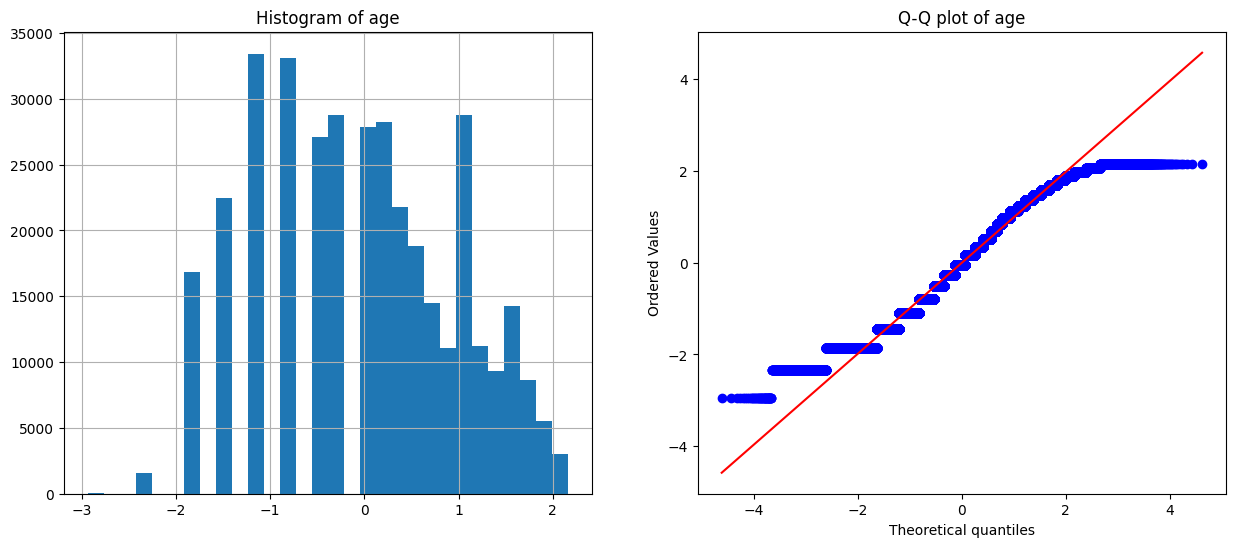

In [232]:
diagnostic_plots(transf_df, 'age')

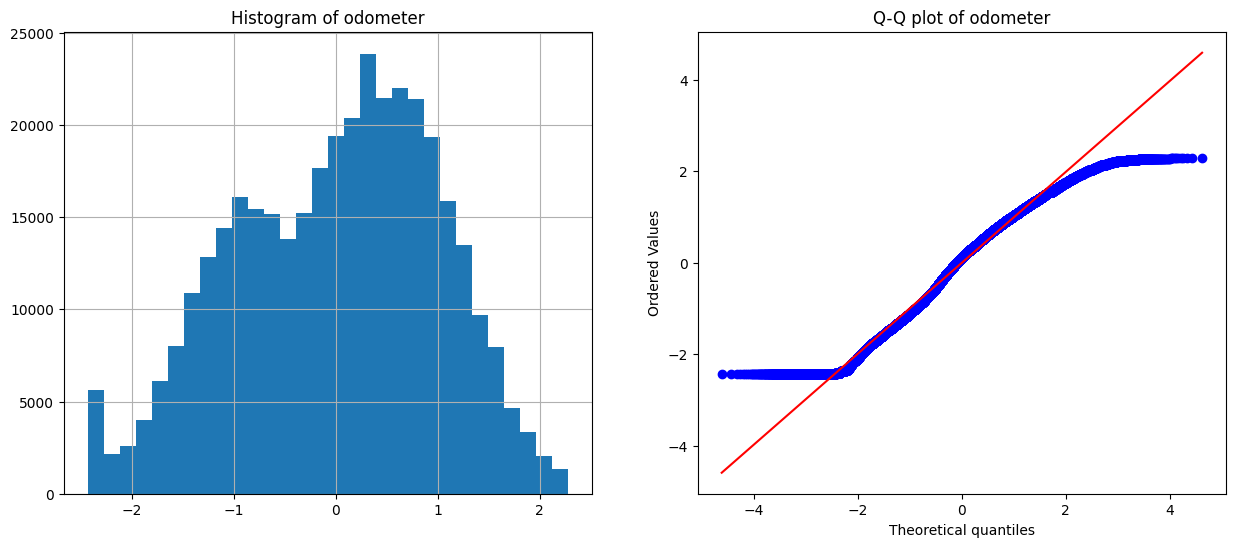

In [233]:
diagnostic_plots(transf_df, 'odometer')

## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Coloca el resultado en un dataframe denominado `minmax_df`.


In [234]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
minmax = scaler.fit_transform(transf_df)
minmax_df = pd.DataFrame(minmax, columns=scaler.get_feature_names_out())
minmax_df

,price,age,odometer
0,0.794063,0.568006,0.436584
1,0.669388,0.711158,0.487199
2,0.852194,0.213642,0.242601
3,0.767017,0.422571,0.364019
4,0.560961,0.608064,0.664757
...,...,...,...
366343,0.682001,0.293623,0.319815
366344,0.762741,0.213642,0.189367
366345,0.808130,0.213642,0.107625
366346,0.745310,0.362359,0.308495


6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

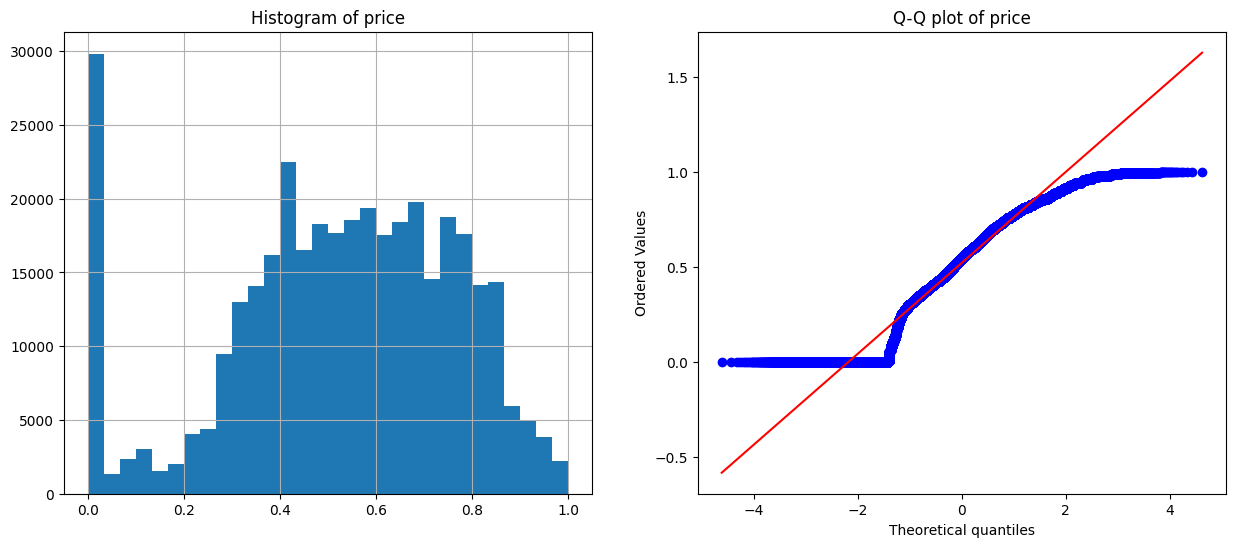

In [235]:
diagnostic_plots(minmax_df, 'price')

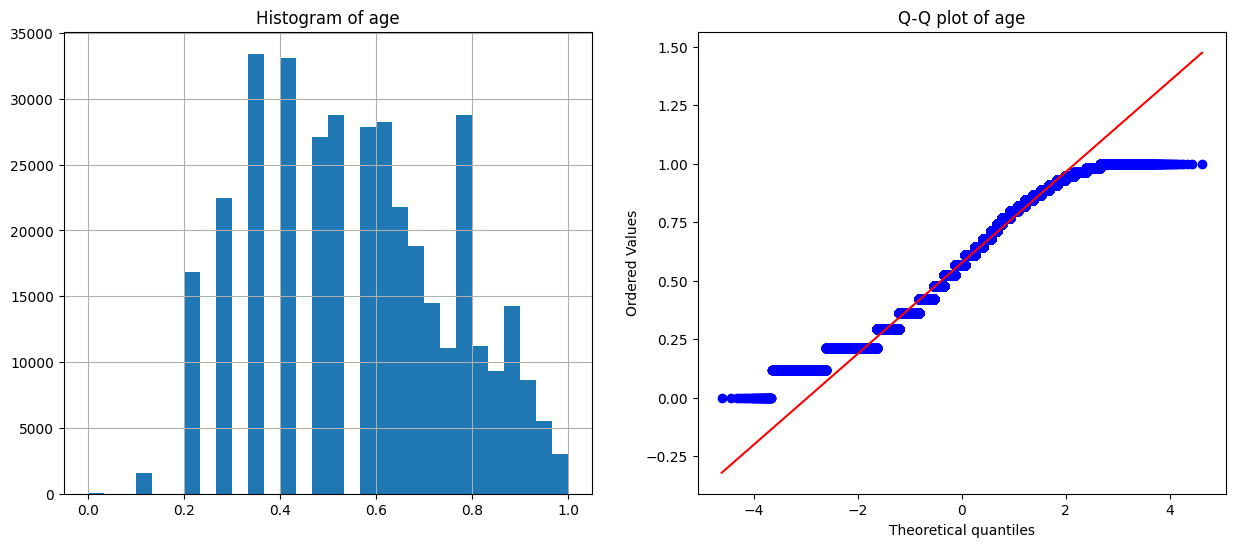

In [236]:
diagnostic_plots(minmax_df, 'age')

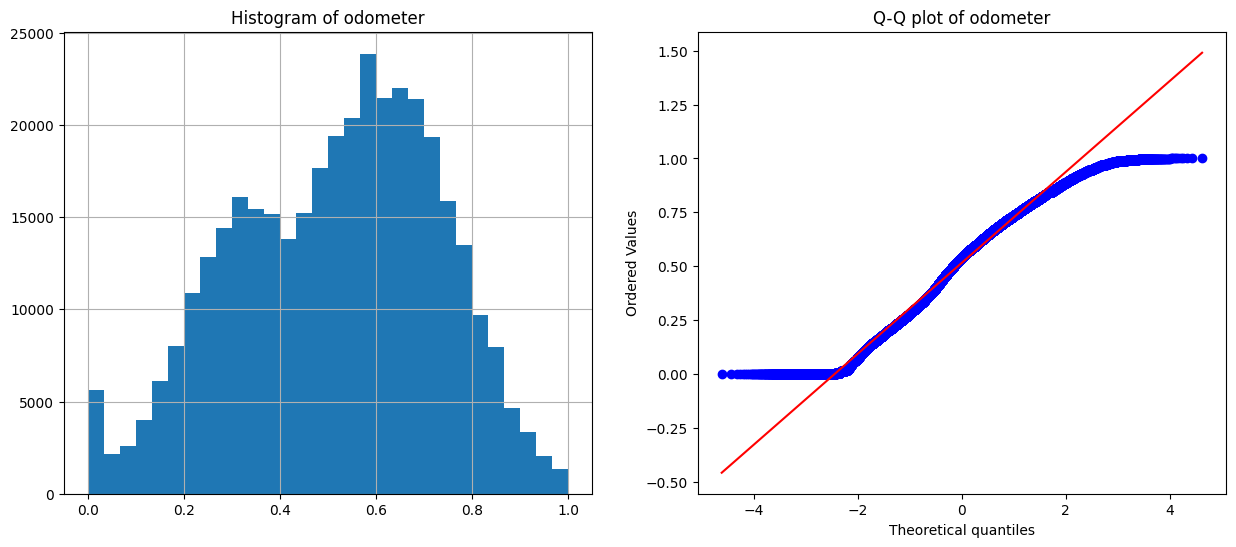

In [237]:
diagnostic_plots(minmax_df, 'odometer')

## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

In [238]:
cars_df.describe(include='object')

,region,region_url,manufacturer,model,fuel,title_status,transmission,type,state
count,366348,366348,366348,366348,366348,366348,366348,366348,366348
unique,404,413,40,19097,5,6,3,13,51
top,columbus,https://grandrapids.craigslist.org,ford,f-150,gas,clean,automatic,sedan,ca
freq,3188,2739,61661,7436,312095,354736,291648,154262,42062


7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente. Una variable es considerada de alta cardinalidad cuando tiene cientos de valores únicos.

In [239]:
object_columns = cars_df.select_dtypes(include=['object']).columns
highly_cardinal_variables = []
few_cardinal_variables = []

for column in object_columns:
    num_unique_values = cars_df[column].nunique()

    # Si la variable tiene más de 100 valores únicos, la consideramos de alta cardinalidad
    if num_unique_values >= 100:
        highly_cardinal_variables.append(column)
    else:
        few_cardinal_variables.append(column)

# Mostrar las listas resultantes
print("Highly Cardinal Variables:", highly_cardinal_variables)
print("Few Cardinal Variables:", few_cardinal_variables)

Highly Cardinal Variables: ['region', 'region_url', 'model']
Few Cardinal Variables: ['manufacturer', 'fuel', 'title_status', 'transmission', 'type', 'state']


7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

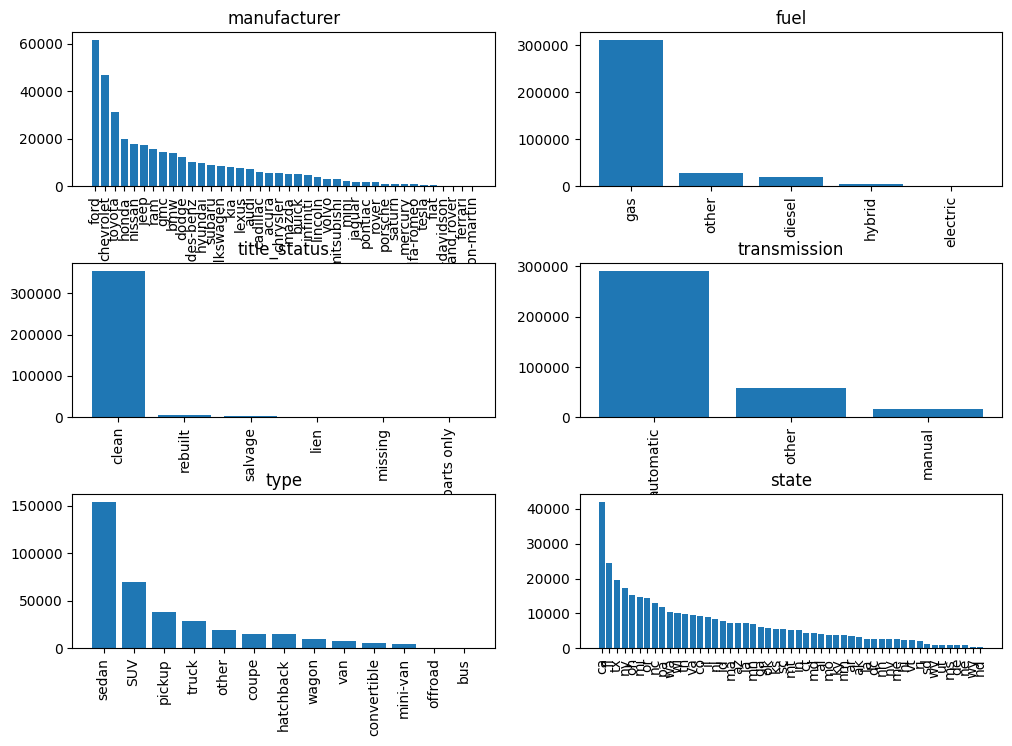

In [240]:
fig, axes = plt.subplots(3,2, figsize=(12,8))
plt.subplots_adjust(hspace=0.5)
axes = axes.ravel()
for col, ax in zip(cars_df[few_cardinal_variables], axes):
  value_counts = cars_df[col].value_counts()
  ax.bar(value_counts.index, value_counts.values)
  ax.set(title=f'{col}', xlabel=None)
  ax.tick_params(axis='x',rotation=90)

8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`, borrando la primera categoría (`drop='first'`). Coloca el resultado en un dataframe denominado `onehot_df`.

In [241]:
onehot_df = pd.get_dummies(cars_df[few_cardinal_variables], drop_first=True)

# Mostrar las primeras filas del DataFrame resultante
onehot_df.head().T

,27,28,29,30,31
manufacturer_alfa-romeo,False,False,False,False,False
manufacturer_aston-martin,False,False,False,False,False
manufacturer_audi,False,False,False,False,False
manufacturer_bmw,False,False,False,False,False
manufacturer_buick,False,False,False,False,False
...,...,...,...,...,...
state_vt,False,False,False,False,False
state_wa,False,False,False,False,False
state_wi,False,False,False,False,False
state_wv,False,False,False,False,False


9. Aplica codificación binaria a las variables en `highly_cardinal_variables`. Coloca el resultado en un dataframe denominado `binary_df`.

In [242]:
 !pip install category_encoders
 from category_encoders.binary import BinaryEncoder
 encoder = BinaryEncoder()
 encoded_data = encoder.fit_transform(cars_df[highly_cardinal_variables])
 binary_df = encoded_data
 binary_df.head().T

,27,28,29,30,31
region_0,0,0,0,0,0
region_1,0,0,0,0,0
region_2,0,0,0,0,0
region_3,0,0,0,0,0
region_4,0,0,0,0,0
region_5,0,0,0,0,0
region_6,0,0,0,0,0
region_7,0,0,0,0,0
region_8,1,1,1,1,1
region_url_0,0,0,0,0,0


10. Concatena los dataframes obtenidos: `minmax_df` (cuyas variables numéricas ya están transformadas y escaladas) y las codificaciones anteriores (`onehot_df` y `binary_df`). Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.

In [243]:
# Restablecer los índices de los DataFrames para asegurarnos de que coincidan
minmax_df.reset_index(drop=True, inplace=True)
onehot_df.reset_index(drop=True, inplace=True)
binary_df.reset_index(drop=True, inplace=True)

# Concatenamos los tres DataFrames
final_df = pd.concat([minmax_df, onehot_df, binary_df], axis=1)

# Mostrar las primeras filas del DataFrame final
final_df.head().T

,0,1,2,3,4
price,0.794063,0.669388,0.852194,0.767017,0.560961
age,0.568006,0.711158,0.213642,0.422571,0.608064
odometer,0.436584,0.487199,0.242601,0.364019,0.664757
manufacturer_alfa-romeo,False,False,False,False,False
manufacturer_aston-martin,False,False,False,False,False
...,...,...,...,...,...
model_10,0,0,0,0,0
model_11,0,0,0,0,0
model_12,0,0,0,1,1
model_13,0,1,1,0,0
